## Import Libraries

In [1]:
# Import modules
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the Input file

In [2]:
# Load data
with open('ultimate_data_challenge.json') as data_file:
    data = json.load(data_file)
df = pd.DataFrame(data)
df.shape

(50000, 12)

## Explorative Data Analysis

In [3]:
# Explore data
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


## Handling Missing Data

In [6]:
# Count missing values by column
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [7]:
# Fill missing values with median
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace = True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace = True)

# Drop all rows with missing values in 'phone'
df = df.dropna().reset_index(drop = True)

# check missing values by column
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x11e891350>,
 'caps': [<matplotlib.lines.Line2D at 0x11ea448d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e94cc50>,
 'medians': [<matplotlib.lines.Line2D at 0x11ea4f1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ea4f610>,
 'means': []}

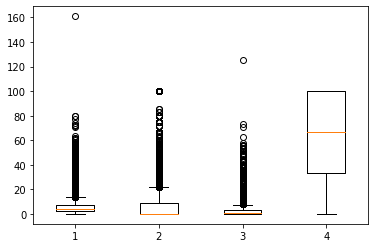

In [8]:

%matplotlib inline

# Check outliers by boxplots
plt.boxplot(df[['avg_dist','surge_pct','trips_in_first_30_days','weekday_pct']])

{'whiskers': [<matplotlib.lines.Line2D at 0x11b7475d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b747e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b747210>,
 'medians': [<matplotlib.lines.Line2D at 0x11b750750>,
 'fliers': [<matplotlib.lines.Line2D at 0x11b750b90>,
 'means': []}

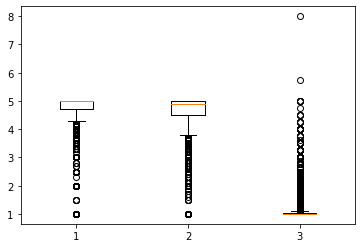

In [9]:
plt.boxplot(df[['avg_rating_by_driver','avg_rating_of_driver','avg_surge']])

#### Count outliers by columns

In [10]:
from collections import defaultdict
outliers = defaultdict(lambda: 0)

# For each feature find the data points with extreme high or low values
for feature in  ('avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct'):
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = df[feature].quantile(0.25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = df[feature].quantile(0.75) 
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    outliers_df = df[(df[feature] < (Q1 - step)) | (df[feature] > (Q3 + step))]

    for index in outliers_df.index.values:
        outliers[index] += 1
        
    print( "Outliers for '{}':".format(feature), outliers_df.shape[0])

Outliers for 'avg_dist': 4477
Outliers for 'avg_rating_by_driver': 3922
Outliers for 'avg_rating_of_driver': 3106
Outliers for 'avg_surge': 8369
Outliers for 'surge_pct': 6768
Outliers for 'trips_in_first_30_days': 3153
Outliers for 'weekday_pct': 0


In [11]:
# Count outliers for more than one feature
outliers_list = [index for (index, count) in outliers.items() if count > 1]
print("Number of outliers for more than one feature: {} ".format(len(outliers_list)))

Number of outliers for more than one feature: 7805 


In [12]:
# Remove the outliers for more than one feature
df = df.drop(df.index[outliers_list]).reset_index(drop = True)
print (df.shape)

(41799, 12)


### Non-numerical variables

In [13]:
# Check unique values for categorical variables
print ("city:", (df.city.unique()))
print ("phone:", (df.phone.unique()))

city: ["King's Landing" 'Astapor' 'Winterfell']
phone: ['iPhone' 'Android']


In [14]:
# Check range of date column
print ("signup_date:", df['signup_date'].min(), df['signup_date'].max())
print ("last_trip_date:", df['last_trip_date'].min(), df['last_trip_date'].max())

signup_date: 2014-01-01 2014-01-31
last_trip_date: 2014-01-01 2014-07-01


In [15]:
# Label predicted variable
# The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
# I would assume a user retained if the `last_trip_date` is after "2014-06-01" while assuming the current date is "2014-07-01".
df['active'] = df.last_trip_date >= '2014-06-01'

# Drop 'last_trip_date'
del df['last_trip_date']

# What's the null error rate? what percentage retented?
df["active"].mean()

0.37405201081365586

In [16]:
df.dtypes # data types of columns

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                       bool
dtype: object

## Data Visualization

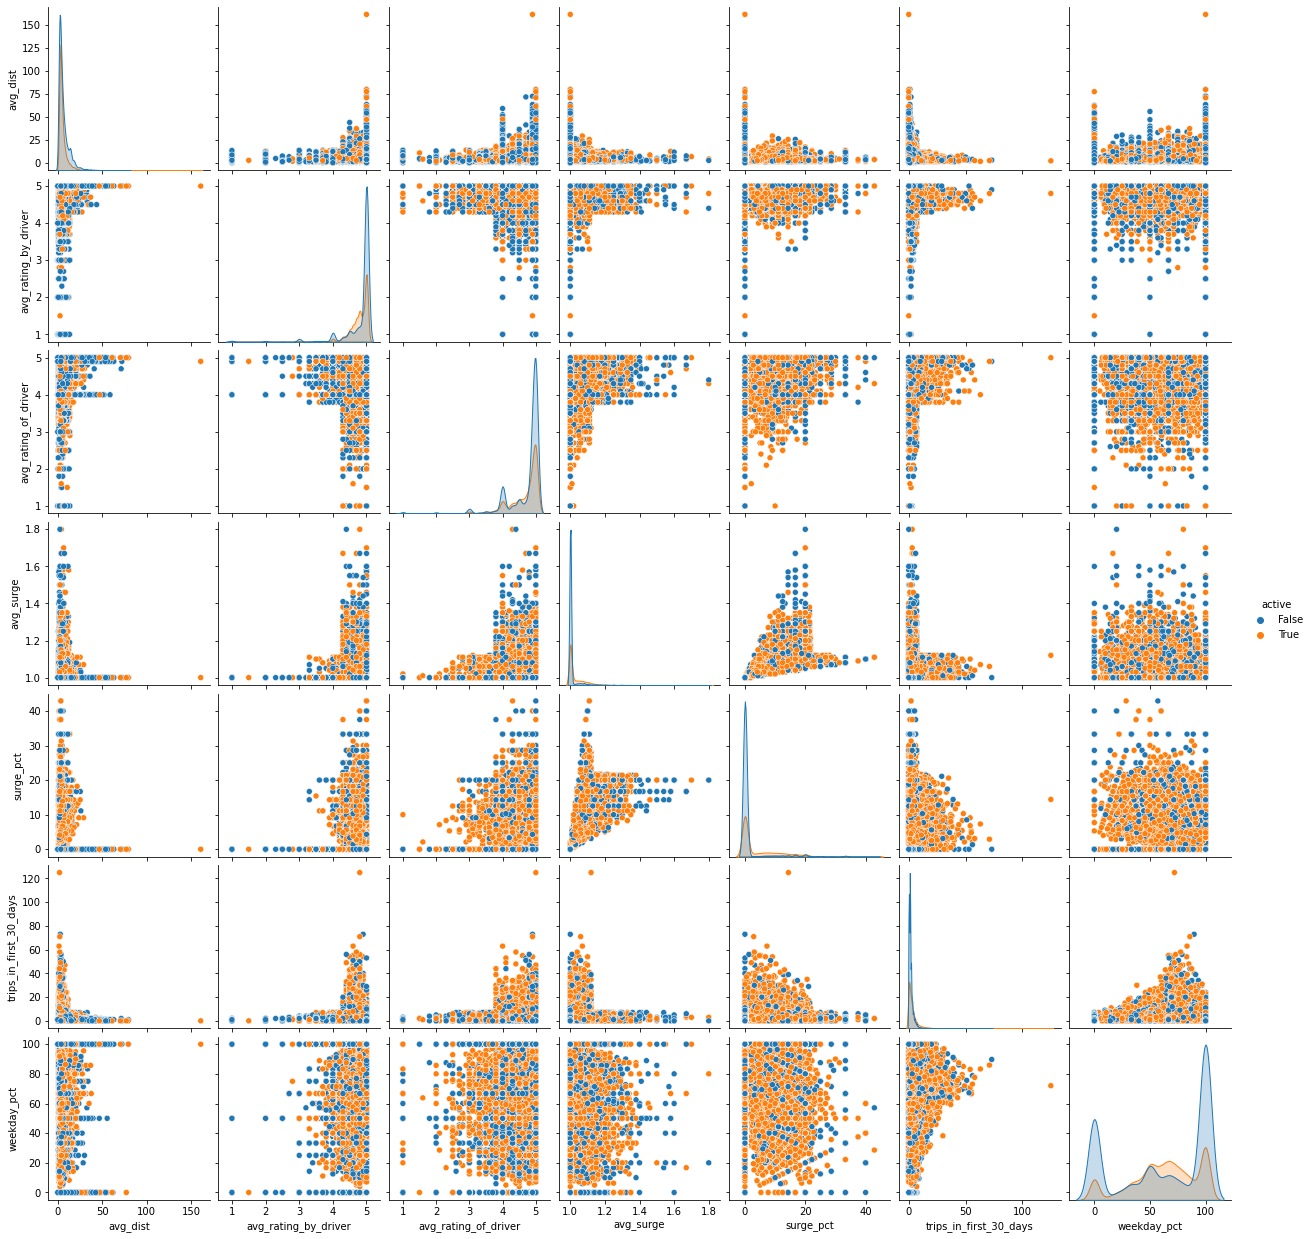

In [17]:
import seaborn as sns
# Seperate quantitative features and categorical features
quant_features = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct', 'active']

# Visualize pairwise relationships between quantitative features 
sns.pairplot(df[quant_features], 
             hue = "active", 
             vars = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct']
            )

#### Correlation Matrix

<AxesSubplot:>

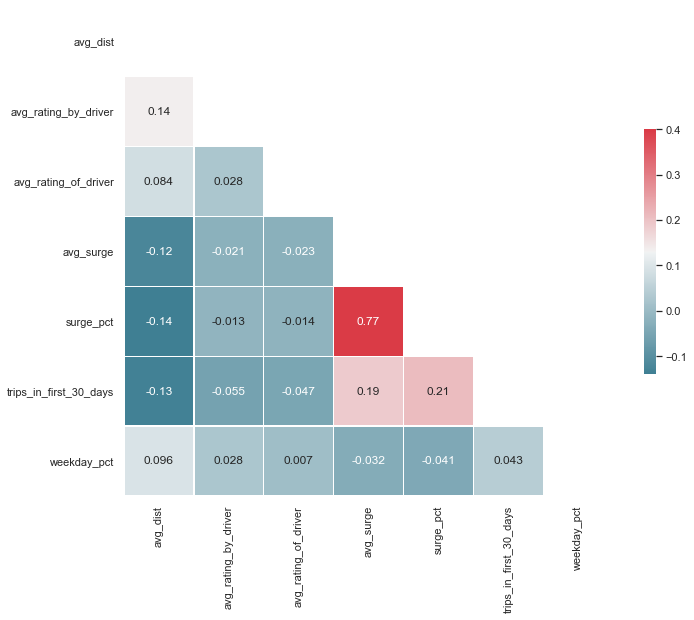

In [18]:
sns.set(style="white")

# Compute the correlation matrix
corr = df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#### Barplots for non-numerical features

<AxesSubplot:xlabel='city', ylabel='count'>

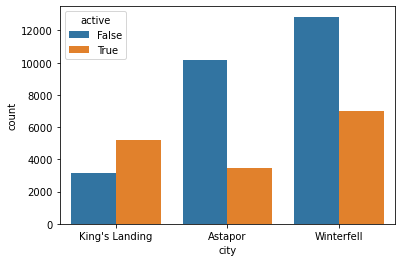

In [18]:
sns.countplot(x="city", hue="active", data=df)

<AxesSubplot:xlabel='phone', ylabel='count'>

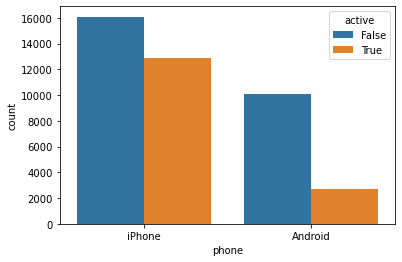

In [19]:
sns.countplot(x="phone", hue="active", data=df)

<AxesSubplot:xlabel='ultimate_black_user', ylabel='count'>

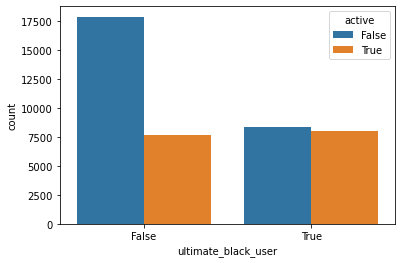

In [20]:
sns.countplot(x="ultimate_black_user", hue="active", data=df)

## Methodology

### Define Performance Metric

In [17]:
from sklearn.metrics import roc_auc_score

def performance_metric(y_true, y_predict):
    score = roc_auc_score(y_true, y_predict)  
    return score

### Data Preprocessing

In [18]:
from sklearn import preprocessing

# Encode all non-numerical variables
le = preprocessing.LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['phone'] = le.fit_transform(df["phone"])
df['signup_date'] = le.fit_transform(df["signup_date"])
df['ultimate_black_user'] = le.fit_transform(df["ultimate_black_user"])
#train['phone'] = train['phone'].map({'iPhone': 1, 'Android': 0}).astype(float)
df.dtypes

city                        int64
trips_in_first_30_days      int64
signup_date                 int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                       int64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
active                       bool
dtype: object

In [19]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,4,24,4.7,1.1,1,15.4,1,46.2,3.67,5.0,True
1,0,0,28,5.0,1.0,0,0.0,0,50.0,8.26,5.0,False
2,0,3,5,4.3,1.0,1,0.0,0,100.0,0.77,5.0,False
3,2,2,8,3.5,1.0,1,0.0,1,100.0,10.56,5.0,True
4,0,1,23,4.9,1.0,0,0.0,0,100.0,3.95,4.0,False


### Split Data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('active', axis = 1)
y = df["active"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Benchmark

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
lm = LogisticRegression()

# Train the model
lm.fit(X_train, y_train)

LogisticRegression()

In [22]:
# check the  accuracy by AUC score on the testing set
print (performance_metric(y_train, lm.predict(X_train)))
print (performance_metric(y_test, lm.predict(X_test)))

0.652162524298698
0.6559025156456453


### Implementation

In [23]:
# Import the three supervised learning algorithms from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Initialize the three models
clf_A = KNeighborsClassifier()
clf_B = SVC(random_state=1)
clf_C = RandomForestClassifier(random_state=1)

# Loop through models, then return respective AUC scores
for clf in [clf_A, clf_B, clf_C]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    clf.fit(X_train, y_train)
    y_predict1 = clf.predict(X_train)
    y_predict = clf.predict(X_test)
    print (performance_metric(y_train, y_predict1), performance_metric(y_test, y_predict))


KNeighborsClassifier: 

0.780200422311938 0.697244988207507

SVC: 

0.6870547531656647 0.6951885039366779

RandomForestClassifier: 

0.99972647702407 0.7507596420799649


### Refinement

In [24]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection  import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        random forest classifier trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit( n_splits = 10, test_size = 0.30, random_state = 1)
    
    # Create a random forest classifier object
    clf = RandomForestClassifier(random_state=1)

    # Create a dictionary for the parameter 'max_features' and 'max_depth'
    parameters ={
                'max_features': [1,2,3,4,5,6,7,8,9,10,11],
                'max_depth': [1,2,3,4,5,6,7,8,9,10],
                #'n_estimators': [10,20,30,40,50,60,70,80,90,100], # Too slow to implement
                }

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    
    grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scoring_fnc, cv=cv_sets)
                                    

    # Fit the grid search object to the data to compute the optimal model
    grid_obj = grid_obj.fit(X, y)

    # Return the optimal model after fitting the data
    return grid_obj.best_estimator_

In [33]:
# Fit the training data to the model using grid search
clf = fit_model(X_train, y_train)

In [25]:
y_train_predict = clf.predict(X_train)

In [26]:
y_predict = clf.predict(X_test)

In [27]:
print ("Tuned model has a training AUROC score of {:.4f}.".format(performance_metric(y_train, y_train_predict)))

Tuned model has a training AUROC score of 0.9997.


In [28]:
print ("Tuned model has a testing AUROC score of {:.4f}.".format(performance_metric(y_test, y_predict)))

Tuned model has a testing AUROC score of 0.7508.


In [51]:
print ("Parameter 'max_features' is {} for the optimal model.".format(clf.get_params()['max_features']))

Parameter 'max_features' is 10 for the optimal model.


In [52]:
print ("Parameter 'max_depth' is {} for the optimal model.".format(clf.get_params()['max_depth']))

Parameter 'max_depth' is 8 for the optimal model.


In [53]:
print ("Parameter 'n_estimators' is {} for the optimal model.".format(clf.get_params()['n_estimators']))

Parameter 'n_estimators' is 100 for the optimal model.


In [50]:
# Change "n_estimators" to 100
clf = RandomForestClassifier(max_features=10, max_depth=8, n_estimators=100, random_state=1)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_predict = clf.predict(X_test)

print ("Tuned model has a training AUROC score of {:.4f}.".format(performance_metric(y_train, y_train_predict)))
print ("Tuned model has a testing AUROC score of {:.4f}.".format(performance_metric(y_test, y_predict)))

Tuned model has a training AUROC score of 0.7704.
Tuned model has a testing AUROC score of 0.7572.


## Results

### Model Evaluation and Validation

In [70]:
import sklearn.model_selection as learning_curve
from sklearn.model_selection import validation_curve

def plt_max_features(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit( X.shape[0] , test_size = 0.3, random_state = 1)

    # Vary the max_depth parameter from 1 to 10
    features_range = np.arange(1,12)

    # Create a Random Forest classifier at optimal settings
    clf = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=1)
  
    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(clf, X, y,param_name = "max_features", param_range = features_range, cv = cv, scoring = 'roc_auc')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest Classifier Complexity Performance')
    plt.plot(features_range, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(features_range, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(features_range, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(features_range, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Features')
    plt.ylabel('AUROC Score')
    plt.ylim([0.83,0.88])
    plt.show()

def plt_max_depth(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit( X.shape[0] , test_size = 0.3, random_state = 1)

    # Vary the max_depth parameter from 1 to 10
    depth_range = np.arange(1,11)

    # Create a Random Forest classifier at optimal settings
    clf = RandomForestClassifier(max_features=10, n_estimators=100, random_state=1)
  
    # Calculate the training and testing scores
    train_scores, test_scores =validation_curve(clf, X, y, param_name = "max_depth", param_range = depth_range, cv = cv, scoring = 'roc_auc')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Random Forest Classifier Complexity Performance')
    plt.plot(depth_range, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(depth_range, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(depth_range, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(depth_range, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('AUROC Score')
    plt.ylim([0.60,0.95])
    plt.show()

In [ ]:
plt_max_features(X_train, y_train)

In [ ]:
plt_max_depth(X_train, y_train)

In [41]:
clf = RandomForestClassifier(max_features=4, max_depth=9, n_estimators=100, random_state=1)
clf = clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_predict = clf.predict(X_test)

print ("Tuned model has a training AUROC score of {:.4f}.".format(performance_metric(y_train, y_train_predict)))
print ("Tuned model has a testing AUROC score of {:.4f}.".format(performance_metric(y_test, y_predict)))

Tuned model has a training AUROC score of 0.7720.
Tuned model has a testing AUROC score of 0.7514.


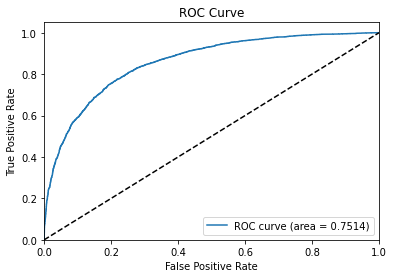

In [42]:
%matplotlib inline
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

roc_auc = roc_auc_score(y_test, y_predict)  

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusion

### Feature Importance

Feature ranking:
                         0         1
6                surge_pct  0.241637
10    avg_rating_by_driver  0.127290
8              weekday_pct  0.117100
0                     city  0.116928
9                 avg_dist  0.076302
4                avg_surge  0.074486
5                    phone  0.065332
1   trips_in_first_30_days  0.060959
7      ultimate_black_user  0.044258
2              signup_date  0.043134
3     avg_rating_of_driver  0.032574


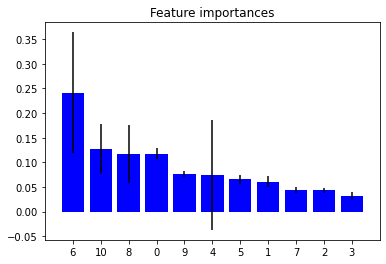

In [44]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Check feature importance
# for f in range(X_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
importances_df = pd.DataFrame(list(zip(X_train.columns, np.transpose(clf.feature_importances_)))).sort_values([1], ascending=False)
print (importances_df)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [46]:
pd.DataFrame(list(zip(X_train.columns, np.transpose(clf.feature_importances_)))).sort_values([1],ascending=False) 

,0,1
6,surge_pct,0.241637
10,avg_rating_by_driver,0.127290
8,weekday_pct,0.117100
0,city,0.116928
9,avg_dist,0.076302
4,avg_surge,0.074486
5,phone,0.065332
1,trips_in_first_30_days,0.060959
7,ultimate_black_user,0.044258
2,signup_date,0.043134
